In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
cot= pd.read_csv('../data/cot_data_2011-2025.csv')

C:\Users\jamal\AppData\Local\Temp\ipykernel_16084\3998450895.py:1: DtypeWarning: Columns (2,68) have mixed types. Specify dtype option on import or set low_memory=False.
  cot= pd.read_csv('../data/cot_data_2011-2025.csv')


In [18]:
cot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32985 entries, 0 to 32984
Data columns (total 89 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Market_and_Exchange_Names         32985 non-null  object 
 1   As_of_Date_In_Form_YYMMDD         32985 non-null  int64  
 2   Report_Date_as_MM_DD_YYYY         3779 non-null   object 
 3   CFTC_Contract_Market_Code         32985 non-null  object 
 4   CFTC_Market_Code                  32985 non-null  object 
 5   CFTC_Region_Code                  32985 non-null  int64  
 6   CFTC_Commodity_Code               32985 non-null  int64  
 7   Open_Interest_All                 32985 non-null  int64  
 8   Dealer_Positions_Long_All         32985 non-null  int64  
 9   Dealer_Positions_Short_All        32985 non-null  int64  
 10  Dealer_Positions_Spread_All       32985 non-null  int64  
 11  Asset_Mgr_Positions_Long_All      32985 non-null  int64  
 12  Asse

In [19]:
print(cot.head())

                        Market_and_Exchange_Names  As_of_Date_In_Form_YYMMDD  \
0  CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE                      111227   
1  CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE                      111220   
2  CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE                      111213   
3  CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE                      111206   
4  CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE                      111129   

  Report_Date_as_MM_DD_YYYY CFTC_Contract_Market_Code CFTC_Market_Code  \
0                2011-12-27                   090741              CME    
1                2011-12-20                   090741              CME    
2                2011-12-13                   090741              CME    
3                2011-12-06                   090741              CME    
4                2011-11-29                   090741              CME    

   CFTC_Region_Code  CFTC_Commodity_Code  Open_Interest_All  \
0          

In [20]:
sp500_cot_data = cot[
    cot['Market_and_Exchange_Names'].str.contains('S&P 500 Consolidated - CHICAGO MERCANTILE EXCHANGE')
].copy()

print(f"Shape of Consolidated S&P 500 COT Data: {sp500_cot_data.shape}")
print(sp500_cot_data.head())

Shape of Consolidated S&P 500 COT Data: (744, 89)
                             Market_and_Exchange_Names  \
621  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
622  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
623  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
624  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
625  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   

     As_of_Date_In_Form_YYMMDD Report_Date_as_MM_DD_YYYY  \
621                     111227                2011-12-27   
622                     111220                2011-12-20   
623                     111213                2011-12-13   
624                     111206                2011-12-06   
625                     111129                2011-11-29   

    CFTC_Contract_Market_Code CFTC_Market_Code  CFTC_Region_Code  \
621                   13874+              CME                  0   
622                   13874+              CME                  0   
623                   13874+        

In [21]:
# Convert 'As_of_Date_In_Form_YYMMDD' to datetime objects
sp500_cot_data['Date'] = pd.to_datetime(sp500_cot_data['As_of_Date_In_Form_YYMMDD'], format='%y%m%d')

# Set the 'Date' column as the index and sort it
sp500_cot_data.set_index('Date', inplace=True)
sp500_cot_data.sort_index(inplace=True)

print(sp500_cot_data.head())
print(sp500_cot_data.index.dtype)

                                    Market_and_Exchange_Names  \
Date                                                            
2011-01-04  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
2011-01-11  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
2011-01-18  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
2011-01-25  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   
2011-02-01  S&P 500 Consolidated - CHICAGO MERCANTILE EXCH...   

            As_of_Date_In_Form_YYMMDD Report_Date_as_MM_DD_YYYY  \
Date                                                              
2011-01-04                     110104                2011-01-04   
2011-01-11                     110111                2011-01-11   
2011-01-18                     110118                2011-01-18   
2011-01-25                     110125                2011-01-25   
2011-02-01                     110201                2011-02-01   

           CFTC_Contract_Market_Code CFTC_Market_Code  CFTC_Region_Code  \

In [22]:
# Calculate net positions for each trader category
sp500_cot_data['Dealer_Net'] = sp500_cot_data['Dealer_Positions_Long_All'] - sp500_cot_data['Dealer_Positions_Short_All']
sp500_cot_data['Asset_Mgr_Net'] = sp500_cot_data['Asset_Mgr_Positions_Long_All'] - sp500_cot_data['Asset_Mgr_Positions_Short_All']
sp500_cot_data['Lev_Money_Net'] = sp500_cot_data['Lev_Money_Positions_Long_All'] - sp500_cot_data['Lev_Money_Positions_Short_All']
sp500_cot_data['Other_Rept_Net'] = sp500_cot_data['Other_Rept_Positions_Long_All'] - sp500_cot_data['Other_Rept_Positions_Short_All']
sp500_cot_data['NonRept_Net'] = sp500_cot_data['NonRept_Positions_Long_All'] - sp500_cot_data['NonRept_Positions_Short_All']

# Select the desired columns
selected_cot_data = sp500_cot_data[[
    'Open_Interest_All',
    'Dealer_Net',
    'Asset_Mgr_Net',
    'Lev_Money_Net',
    'Other_Rept_Net',
    'NonRept_Net'
]].copy()

print(f"Shape of Selected S&P 500 COT Data: {selected_cot_data.shape}")
print(selected_cot_data.head())

Shape of Selected S&P 500 COT Data: (744, 6)
            Open_Interest_All  Dealer_Net  Asset_Mgr_Net  Lev_Money_Net  \
Date                                                                      
2011-01-04             893694     -257444         293587         -64497   
2011-01-11             926081     -258922         286304         -57912   
2011-01-18             973354     -245873         296234         -75360   
2011-01-25             941013     -252473         300003         -74945   
2011-02-01             984073     -241183         294429         -79222   

            Other_Rept_Net  NonRept_Net  
Date                                     
2011-01-04           -6313        34668  
2011-01-11           -7918        38448  
2011-01-18           -6739        31737  
2011-01-25           -9513        36929  
2011-02-01          -13831        39806  


In [23]:
selected_cot_data.isnull().sum()

Open_Interest_All    0
Dealer_Net           0
Asset_Mgr_Net        0
Lev_Money_Net        0
Other_Rept_Net       0
NonRept_Net          0
dtype: int64

In [24]:
import yfinance as yf
import datetime
import pandas as pd

# Define the ticker symbol for SPY
spy_ticker = "SPY"

# Define the start date
start_date_spy = "2011-01-01"

# Define the end date as today's date
end_date_spy = datetime.date.today().strftime("%Y-%m-%d")
print(f"Downloading SPY data until: {end_date_spy}")

# Download SPY historical data from Yahoo Finance
spy_prices = yf.download(spy_ticker, start=start_date_spy, end=end_date_spy)

# Select the 'Close' price
spy_prices = spy_prices[['Close']]

# Flatten the column index of spy_prices
spy_prices.columns = spy_prices.columns.get_level_values(0)

# Rename the 'Close' column (now single-level)
spy_prices = spy_prices.rename(columns={'Close': 'SPY_Close'}) # Renaming to avoid potential name conflicts

print(f"Shape of SPY Data (2011 to {end_date_spy}): {spy_prices.shape}")
print(spy_prices.head())
print(spy_prices.tail())
print("\nSPY Prices Column Index:", spy_prices.columns)

# Now merge with the COT data
# Assuming you have your selected_cot_data DataFrame ready
if 'selected_cot_data' in locals():
    merged_data = pd.merge(selected_cot_data, spy_prices, left_index=True, right_index=True, how='outer')
    print(f"\nShape of Merged Data: {merged_data.shape}")
    print(merged_data.head())
else:
    print("\nMake sure the 'selected_cot_data' DataFrame is created before merging.")

[*********************100%***********************]  1 of 1 completed

Shape of SPY Data (2011 to 2025-04-08): (3587, 1)
Price       SPY_Close
Date                 
2011-01-03  98.039307
2011-01-04  97.985291
2011-01-05  98.494598
2011-01-06  98.301659
2011-01-07  98.108772
Price        SPY_Close
Date                  
2025-04-01  560.969971
2025-04-02  564.520020
2025-04-03  536.700012
2025-04-04  505.279999
2025-04-07  504.380005

SPY Prices Column Index: Index(['SPY_Close'], dtype='object', name='Price')

Shape of Merged Data: (3588, 7)
            Open_Interest_All  Dealer_Net  Asset_Mgr_Net  Lev_Money_Net  \
Date                                                                      
2011-01-03                NaN         NaN            NaN            NaN   
2011-01-04           893694.0   -257444.0       293587.0       -64497.0   
2011-01-05                NaN         NaN            NaN            NaN   
2011-01-06                NaN         NaN            NaN            NaN   
2011-01-07                NaN         NaN            NaN            NaN   


In [25]:
# Convierte la columna 'As_of_Date_In_Form_YYMMDD' a datetime
cot['Date'] = pd.to_datetime(cot['As_of_Date_In_Form_YYMMDD'], format='%y%m%d')

# Establece 'Date' como índice
cot.set_index('Date', inplace=True)

# Ahora, imprime nuevamente las fechas de inicio y fin
start_date = cot.index.min()
end_date = cot.index.max()

print(f"Fecha de inicio: {start_date}")
print(f"Fecha de fin: {end_date}")


Fecha de inicio: 2011-01-04 00:00:00
Fecha de fin: 2025-04-01 00:00:00


In [26]:
merged_data_ffill = merged_data.fillna(method='ffill')
print(merged_data_ffill.head(10))

            Open_Interest_All  Dealer_Net  Asset_Mgr_Net  Lev_Money_Net  \
Date                                                                      
2011-01-03                NaN         NaN            NaN            NaN   
2011-01-04           893694.0   -257444.0       293587.0       -64497.0   
2011-01-05           893694.0   -257444.0       293587.0       -64497.0   
2011-01-06           893694.0   -257444.0       293587.0       -64497.0   
2011-01-07           893694.0   -257444.0       293587.0       -64497.0   
2011-01-10           893694.0   -257444.0       293587.0       -64497.0   
2011-01-11           926081.0   -258922.0       286304.0       -57912.0   
2011-01-12           926081.0   -258922.0       286304.0       -57912.0   
2011-01-13           926081.0   -258922.0       286304.0       -57912.0   
2011-01-14           926081.0   -258922.0       286304.0       -57912.0   

            Other_Rept_Net  NonRept_Net  SPY_Close  
Date                                          

C:\Users\jamal\AppData\Local\Temp\ipykernel_16084\802037619.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data_ffill = merged_data.fillna(method='ffill')


In [27]:
spy_prices.columns

Index(['SPY_Close'], dtype='object', name='Price')

In [40]:
cot['Asset_Mgr_Net'] = cot['Asset_Mgr_Positions_Long_All'] - cot['Asset_Mgr_Positions_Short_All']

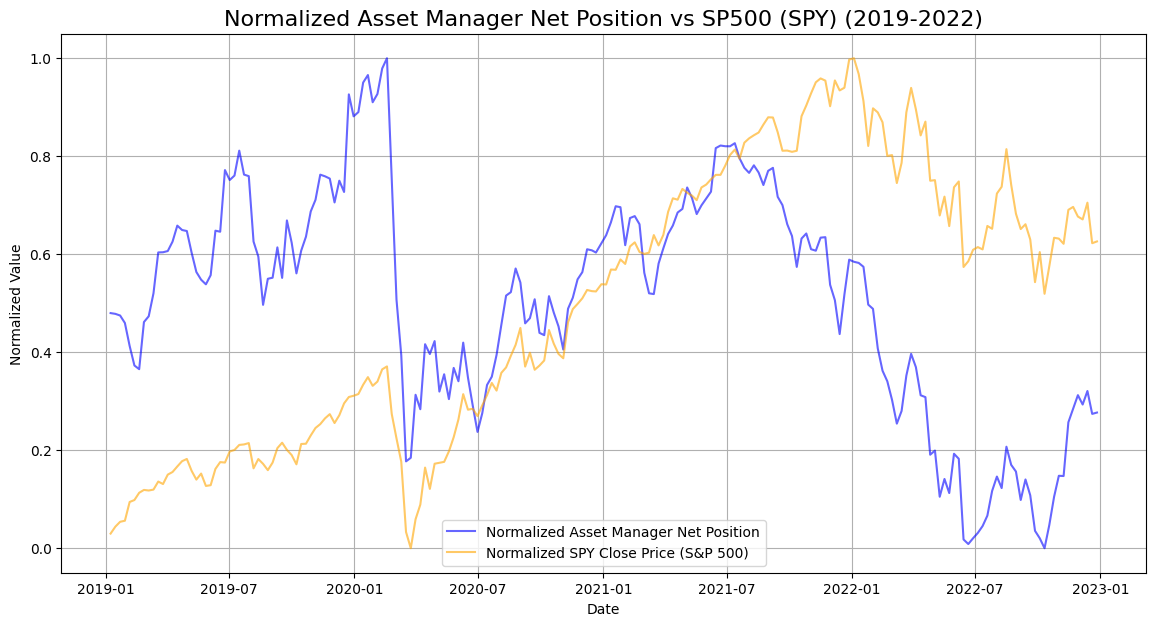

Correlación entre las posiciones netas de los Asset Managers y el precio del SP500 (normalizado): -0.0841


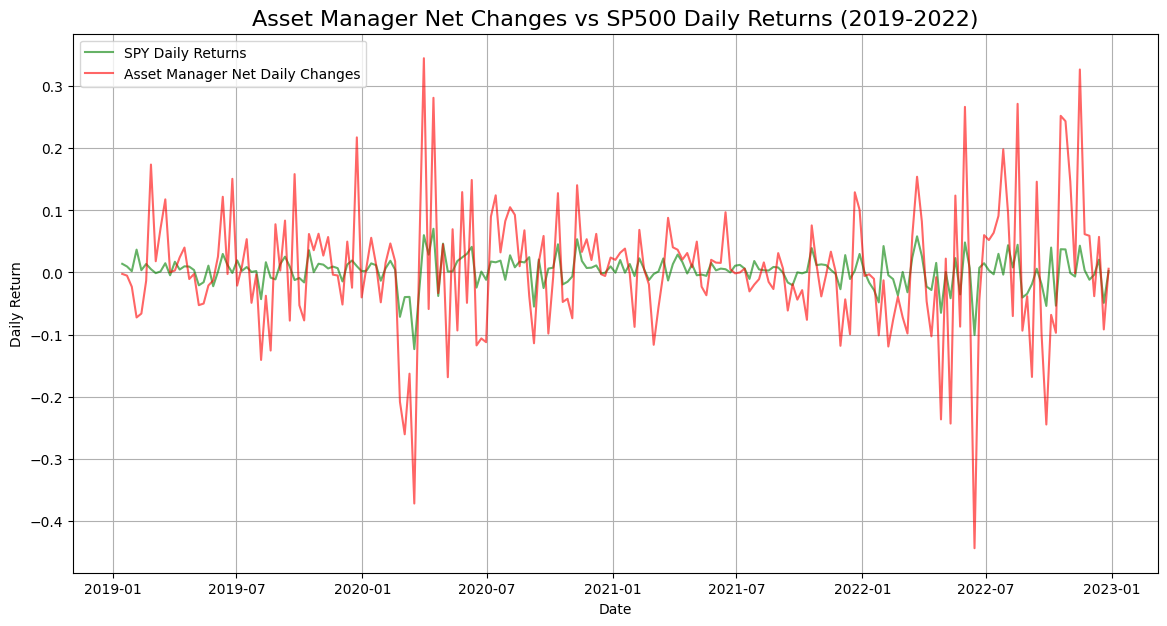

Correlación entre las variaciones relativas de los Asset Managers y el precio del SP500: 0.7172


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limitar los datos entre 2019 y 2022
merged_data = merged_data[(merged_data.index >= '2019-01-01') & (merged_data.index <= '2022-12-31')]

# Asegurarnos de que los datos están bien sincronizados y no contienen valores NaN
merged_data.dropna(subset=['Asset_Mgr_Net', 'SPY_Close'], inplace=True)

# Normalizar los datos (escala de 0 a 1) para comparar ambos en el mismo gráfico
merged_data['Asset_Mgr_Net_Normalized'] = (merged_data['Asset_Mgr_Net'] - merged_data['Asset_Mgr_Net'].min()) / (merged_data['Asset_Mgr_Net'].max() - merged_data['Asset_Mgr_Net'].min())
merged_data['SPY_Close_Normalized'] = (merged_data['SPY_Close'] - merged_data['SPY_Close'].min()) / (merged_data['SPY_Close'].max() - merged_data['SPY_Close'].min())

# 1. **Visualización de las posiciones netas de los Asset Managers vs. precios del SP500**
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['Asset_Mgr_Net_Normalized'], label='Normalized Asset Manager Net Position', color='blue', alpha=0.6)
plt.plot(merged_data.index, merged_data['SPY_Close_Normalized'], label='Normalized SPY Close Price (S&P 500)', color='orange', alpha=0.6)
plt.title('Normalized Asset Manager Net Position vs SP500 (SPY) (2019-2022)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()

# 2. **Correlación entre las posiciones netas de los Asset Managers y el precio del SP500**
correlation = merged_data['Asset_Mgr_Net_Normalized'].corr(merged_data['SPY_Close_Normalized'])
print(f"Correlación entre las posiciones netas de los Asset Managers y el precio del SP500 (normalizado): {correlation:.4f}")

# 3. **Análisis de las variaciones relativas:**
# Primero calculamos las variaciones relativas (diferencias porcentuales)
merged_data['SPY_Close_Returns'] = merged_data['SPY_Close'].pct_change()
merged_data['Asset_Mgr_Net_Returns'] = merged_data['Asset_Mgr_Net'].pct_change()

# Graficamos las variaciones relativas
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['SPY_Close_Returns'], label='SPY Daily Returns', color='green', alpha=0.6)
plt.plot(merged_data.index, merged_data['Asset_Mgr_Net_Returns'], label='Asset Manager Net Daily Changes', color='red', alpha=0.6)
plt.title('Asset Manager Net Changes vs SP500 Daily Returns (2019-2022)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# 4. **Correlación de las variaciones relativas**
correlation_returns = merged_data['Asset_Mgr_Net_Returns'].corr(merged_data['SPY_Close_Returns'])
print(f"Correlación entre las variaciones relativas de los Asset Managers y el precio del SP500: {correlation_returns:.4f}")


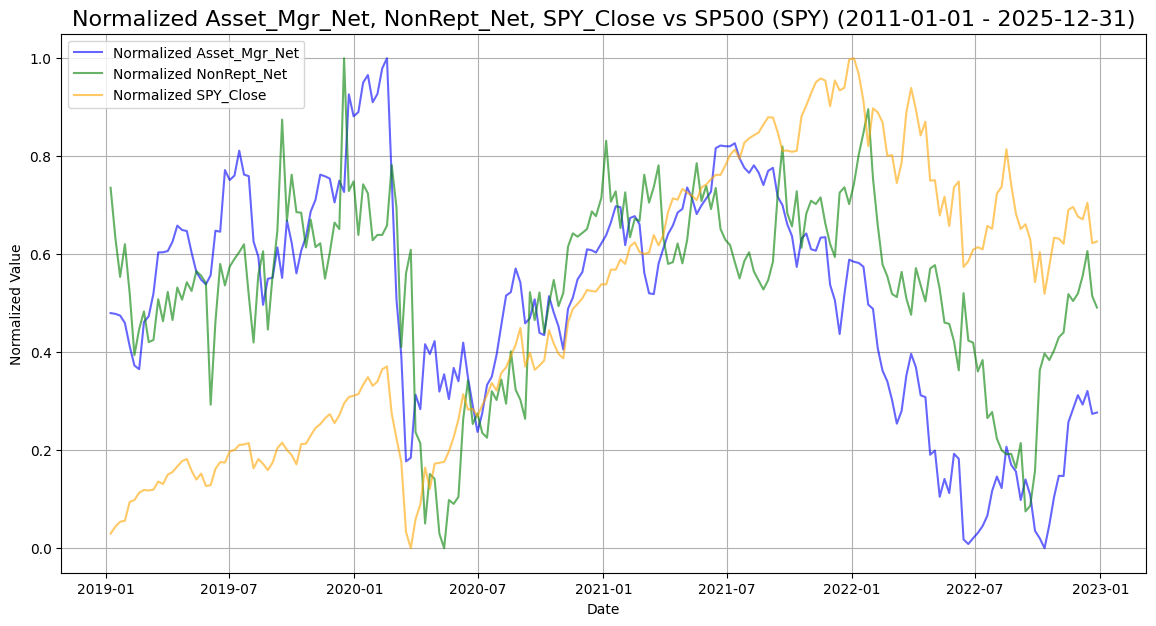

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Variables que puedes cambiar:**
# Definir el rango de fechas que deseas analizar
start_date = '2011-01-01'  # Fecha de inicio
end_date = '2025-12-31'    # Fecha de fin

# Definir las columnas a normalizar y graficar
columns_to_plot = ['Asset_Mgr_Net', 'NonRept_Net', 'SPY_Close']  # Las columnas que quieres graficar
normalized_column_names = ['Asset_Mgr_Net_Normalized', 'NonRept_Net_Normalized', 'SPY_Close_Normalized']  # Nombres de las columnas normalizadas

# **Filtrado de los datos:**
# Limitar los datos entre el rango de fechas
merged_data = merged_data[(merged_data.index >= start_date) & (merged_data.index <= end_date)]

# Asegurarnos de que los datos están bien sincronizados y no contienen valores NaN
merged_data.dropna(subset=columns_to_plot, inplace=True)

# **Normalización de los datos (escala de 0 a 1):**
# Normalizar las columnas seleccionadas
for col, norm_col in zip(columns_to_plot, normalized_column_names):
    merged_data[norm_col] = (merged_data[col] - merged_data[col].min()) / (merged_data[col].max() - merged_data[col].min())

# **Visualización de las posiciones netas de los Asset Managers, Non Reportable Net y precios del SP500**
plt.figure(figsize=(14, 7))

# Graficamos las posiciones normalizadas de las columnas seleccionadas
colors = ['blue', 'green', 'orange']  # Colores para las líneas
for i, norm_col in enumerate(normalized_column_names):
    plt.plot(merged_data.index, merged_data[norm_col], label=f'Normalized {columns_to_plot[i]}', color=colors[i], alpha=0.6)

# **Personalización del gráfico:**
plt.title(f'Normalized {", ".join(columns_to_plot)} vs SP500 (SPY) ({start_date} - {end_date})', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Value')

# Leyenda y grillas
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
